# Problema da Caixeiro Viajante
## Implementação Serial

In [1]:
import time as t
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [2]:
%%writefile caixeiro_serial_unificado.py
# Importação das bibliotecas
import random
import sys

# CONSTANTES DEFINIDAS NA EXECUÇÃO
QTD_CIDADES   = int(sys.argv[1])
DIST_MIN      = int(sys.argv[2])
DIST_MAX      = int(sys.argv[3])


def gerar_combinacoes(qtd_cidades, matriz):
    lista_inicial = list(range(1, qtd_cidades))
    combinacoes = permutacoes_calculada(lista_inicial, qtd_cidades, matriz)
    # combinacoes = permutacoes(lista_inicial)
    return combinacoes

def permutacoes(lista):
    if (len(lista) == 0):
      return[[]]
    combinacoes = []
    for i in range(len(lista)):
      valor_atual = lista[i]
      lista_pendente = lista[:i]+lista[i+1:]
      lista_permutacoes = permutacoes(lista_pendente)
      for permutacao in lista_permutacoes:
        combinacoes.append([valor_atual]+permutacao)
    return combinacoes

def permutacoes_calculada(lista, qtd_cidades, matriz):
    if (len(lista) == 0):
      return[[]]
    combinacoes = []
    melhor_comb = []
    melhor_custo = 0
    for i in range(len(lista)):
      valor_atual = lista[i]
      lista_pendente = lista[:i]+lista[i+1:]
      lista_permutacoes = permutacoes(lista_pendente)
      for permutacao in lista_permutacoes:
        combinacao = [valor_atual]+permutacao
        if (len(combinacao) == qtd_cidades-1):
          custo = calcular_custo(combinacao, matriz)
          if (custo < melhor_custo or melhor_custo == 0):
            melhor_custo = custo
            combinacoes = []
            combinacoes.append([combinacao, custo])
        else:
          combinacoes.append(combinacao)
    return combinacoes

def calcular_custo(comb, custo):
    valor = 0
    cidade_atual = 0
    comb.append(0)
    for cidade in comb:
      valor += custo[cidade_atual][cidade]
      cidade_atual = cidade
    comb.insert(0, 0)
    return valor

# Função geradora do custo (Matriz de Custo)
def gerar_matriz_distancia(qtd_cidades, dist_min, dist_max):
    random.seed(12)
    matriz_distancia = [[0 for x in range(qtd_cidades)] for y in range(qtd_cidades)]
    for cid_origem in range(qtd_cidades):
        for cid_destino in range(qtd_cidades):
            if cid_origem < cid_destino:
                valor = random.randint(dist_min, dist_max)
                matriz_distancia[cid_origem][cid_destino] = (valor)
                matriz_distancia[cid_destino][cid_origem] = (valor)
            else:
                matriz_distancia[cid_origem][cid_origem] = 0
    return matriz_distancia


def main():
    # Gerando a Matriz de distancia
    print('----------MATRIZ----------')
    matriz = gerar_matriz_distancia(QTD_CIDADES, DIST_MIN, DIST_MAX)
    print(" ", end = "  ")
    for x in range(0, QTD_CIDADES):
        print(x, end = "  ")

    print()
    for index, valores in enumerate(matriz):
      print(index, valores)

    #print('----------COMBINACOES----------')
    combinacoes = gerar_combinacoes(QTD_CIDADES, matriz)

    print()
    print('----------MELHOR COMBINACAO----------')
    for combinacao in combinacoes:
      print('Combinação:', combinacao[0], 'Valor:', combinacao[1])

if __name__ == '__main__':
    main()

Overwriting caixeiro_serial_unificado.py


## Teste do código serial com passagem de parâmetros

In [2]:
# Teste QTD_CIDADES, DIST_MIN, DIST_MAX
!python caixeiro_serial_unificado.py 6 2 9

----------MATRIZ----------
   0  1  2  3  4  5  
0 [0, 9, 6, 7, 4, 8]
1 [9, 0, 2, 7, 9, 6]
2 [6, 2, 0, 9, 5, 2]
3 [7, 7, 9, 0, 4, 9]
4 [4, 9, 5, 4, 0, 7]
5 [8, 6, 2, 9, 7, 0]

----------MELHOR COMBINACAO----------
Combinação: [0, 4, 3, 1, 2, 5, 0] Valor: 27


## Definição de constantes

In [4]:
QTD_CIDADES   = 8
DIST_MIN      = 2
DIST_MAX      = 9

## Fazendo testes de complexidade 
### <font color='Red'>(Execução Demorada!)</font>

In [5]:
# Teste de estresse
tempo_exec=[]
tempo_teorico=[]
for i in range(5, QTD_CIDADES+1):
    tempo_atual = t.time()
    # Teste QTD_CIDADES, DIST_MIN, DIST_MAX
    string = 'python caixeiro_serial_unificado.py '+str(QTD_CIDADES)+' '+str(DIST_MIN)+' '+\
                str(DIST_MAX)+' > NUL' #Jogando a saida para null para não poluir o terminal
    !$string
    tempo_final = t.time()
    tempo_final -= tempo_atual
    tempo_exec.append((i,tempo_final))
    #Comparando os resultados com os valores de f(i) = 2*f(i-1)
    tempo_teorico.append((i+1, tempo_final*DIST_MAX))
print(tempo_exec)
print(tempo_teorico)

[(5, 0.0911111831665039), (6, 0.07757210731506348), (7, 0.07737874984741211), (8, 0.07715368270874023)]
[(6, 0.8200006484985352), (7, 0.6981489658355713), (8, 0.696408748626709), (9, 0.6943831443786621)]


## Gráfico de complexidade X Tamanho da Loja

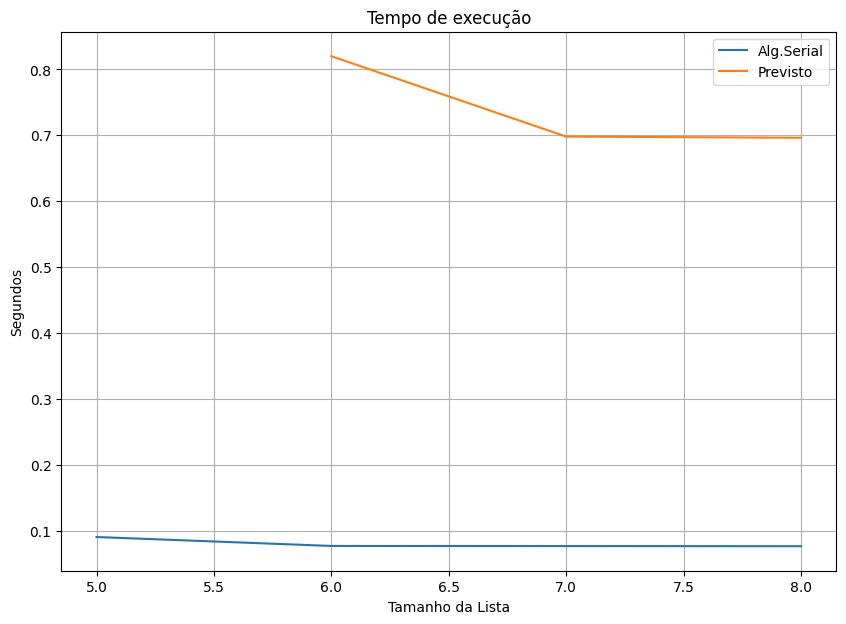

In [6]:
plt.figure(figsize=(10,7))
plt.plot([tempo_exec[i][0] for i in range(len(tempo_exec))], [tempo_exec[i][1] for i in range(len(tempo_exec))], label='Alg.Serial')
plt.plot([tempo_teorico[i][0] for i in range(len(tempo_teorico)-1)], [tempo_teorico[i][1] for i in range(len(tempo_teorico)-1)], label='Previsto')
plt.title('Tempo de execução')
plt.xlabel('Tamanho da Lista')
plt.ylabel('Segundos')
plt.legend()
plt.grid()
plt.show()

## Fazendo testes com constantes definidas (1000 testes) 
### <font color='Red'>(Execução Demorada!)</font>
### Novas constantes para os testes

In [7]:
QTD_CIDADES   = 11
DIST_MIN      = 2
DIST_MAX      = 9

In [8]:
TAM_POP   = 200  # Tamanho da População

In [9]:
# Teste de estresse 2
tempo_exec2=[]
for i in range(TAM_POP):
    tempo_atual = t.time()
    # Teste CAP_MOC, TAM_LOJA, QTD_MAX_PROD, MAX_PRECO, MAX_VOL
    string = 'python caixeiro_serial_unificado.py '+str(QTD_CIDADES)+' '+str(DIST_MIN)+' '+str(DIST_MAX)+' > NUL' #Jogando a saida para null para não poluir o terminal
    !$string
    tempo_final = t.time()
    tempo_final -= tempo_atual
    tempo_exec2.append((i,tempo_final))
    print('Execução: %d - Tempo: %.4f seg.' %(i, tempo_final))
#print(tempo_exec2)

Execução: 0 - Tempo: 16.3420 seg.
Execução: 1 - Tempo: 17.2674 seg.
Execução: 2 - Tempo: 16.2327 seg.
Execução: 3 - Tempo: 15.7520 seg.
Execução: 4 - Tempo: 15.6691 seg.
Execução: 5 - Tempo: 15.7175 seg.
Execução: 6 - Tempo: 15.5648 seg.
Execução: 7 - Tempo: 15.4681 seg.
Execução: 8 - Tempo: 15.4561 seg.
Execução: 9 - Tempo: 15.5488 seg.
Execução: 10 - Tempo: 15.4396 seg.
Execução: 11 - Tempo: 15.5263 seg.
Execução: 12 - Tempo: 15.4911 seg.
Execução: 13 - Tempo: 15.4678 seg.
Execução: 14 - Tempo: 15.8885 seg.
Execução: 15 - Tempo: 15.2103 seg.
Execução: 16 - Tempo: 15.2176 seg.
Execução: 17 - Tempo: 15.2129 seg.
Execução: 18 - Tempo: 17.7944 seg.
Execução: 19 - Tempo: 19.4391 seg.
Execução: 20 - Tempo: 17.6645 seg.
Execução: 21 - Tempo: 16.1742 seg.
Execução: 22 - Tempo: 17.1524 seg.
Execução: 23 - Tempo: 15.8292 seg.
Execução: 24 - Tempo: 15.3025 seg.
Execução: 25 - Tempo: 15.2319 seg.
Execução: 26 - Tempo: 15.1123 seg.
Execução: 27 - Tempo: 15.2637 seg.
Execução: 28 - Tempo: 15.2113 

## Transfomando dados para 'numpy' para uso estatístico
<H3><font color='Red'>Só rodar se a célula anterior for executada</font></H3>

In [10]:
tempo_exec2 = np.array(tempo_exec2)
np.savetxt('dataset_single_core.txt', tempo_exec2, fmt='%f')
#tempo_exec2

# Análise Estatística

## Leitura do Dataset

In [11]:
# Lendo o dataset armazenado
tempo_exec2 = np.loadtxt('dataset_single_core.txt', dtype = float)

## Gráfico de disperção no tempo de execução

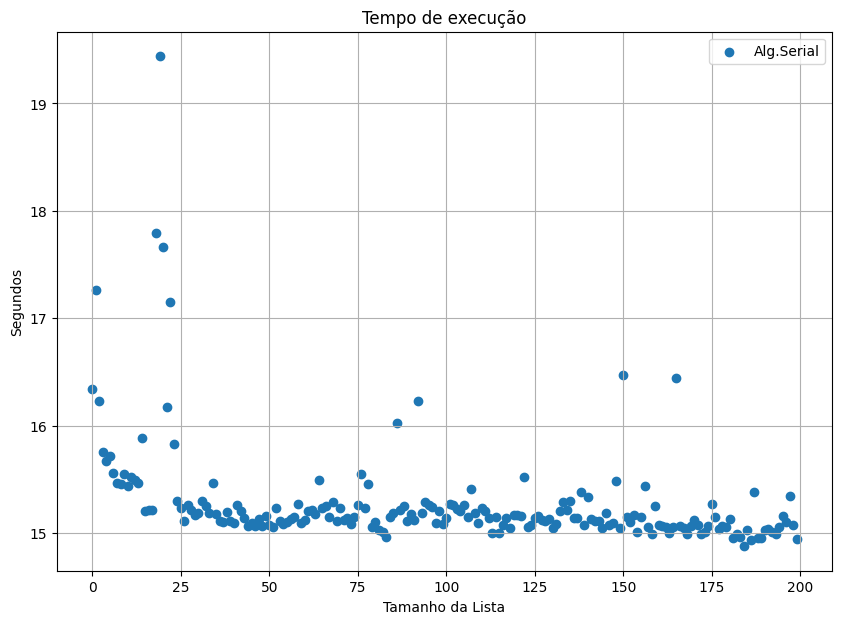

In [12]:
plt.figure(figsize=(10,7))
plt.scatter(tempo_exec2[:,0], tempo_exec2[:,1], label='Alg.Serial')
plt.title('Tempo de execução')
plt.xlabel('Tamanho da Lista')
plt.ylabel('Segundos')
plt.legend()
plt.grid()
plt.show()

## Cálculo de valores centrais:
### (Média, Mediana, Moda)

In [13]:
# Média
tempo_exec2_media = tempo_exec2[:,1].mean()
print('Tempo médio de execução %.4f' %tempo_exec2_media)

Tempo médio de execução 15.2858


In [14]:
# Desvio Padrão
tempo_exec2_std = tempo_exec2[:,1].std()
print('Desvio padrão %.4f' %tempo_exec2_std)

Desvio padrão 0.5045


In [15]:
# Médiana
tempo_exec2_mediana = np.median(tempo_exec2[:,1])
print('Tempo mediano de execuçao %.4f' %tempo_exec2_mediana)

Tempo mediano de execuçao 15.1496


## Análise Frequências

Não é possivel calcular a moda de uma população de valores numéricos contínuos. Neste caso podemos aplicar a **Regra de Sturges** para calcular a frequência da distribuição da amostra.
$$k = 1 + \frac {10}{3}\log_{10}n$$

In [16]:
# Cálculo do intervalo de freqûencia: n = Tamanho da Amostra
n = tempo_exec2.shape[0]
k = 1 + (10/3)*np.log10(n)
k = int(k.round(0))
print(f'Tamanho da Amostra: {k}')

Tamanho da Amostra: 9


In [17]:
# Coletando a frequência
tempo_exec2_freq = np.histogram(tempo_exec2[:,1], bins= k)
print(tempo_exec2_freq)

(array([166,  22,   5,   2,   2,   2,   0,   0,   1], dtype=int64), array([14.878818  , 15.38551744, 15.89221689, 16.39891633, 16.90561578,
       17.41231522, 17.91901467, 18.42571411, 18.93241356, 19.439113  ]))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


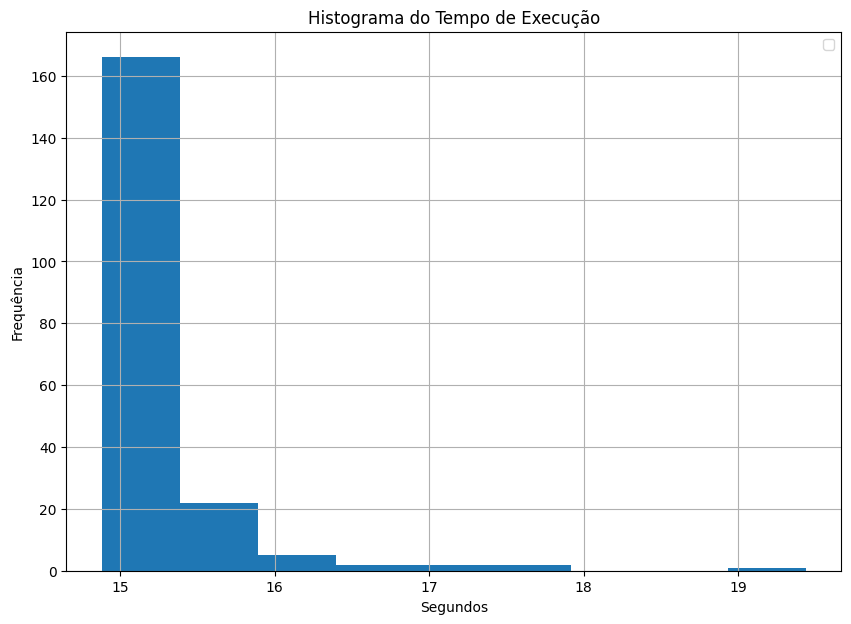

In [18]:
plt.figure(figsize=(10,7))
plt.hist(tempo_exec2[:,1], bins = k)
plt.title('Histograma do Tempo de Execução')
plt.ylabel('Frequência')
plt.xlabel('Segundos')
plt.legend()
plt.grid()
plt.show()

### **Verificando a possbilidade de dados OUTLIERS**
**Medidas Separatrizes**: Quartis

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


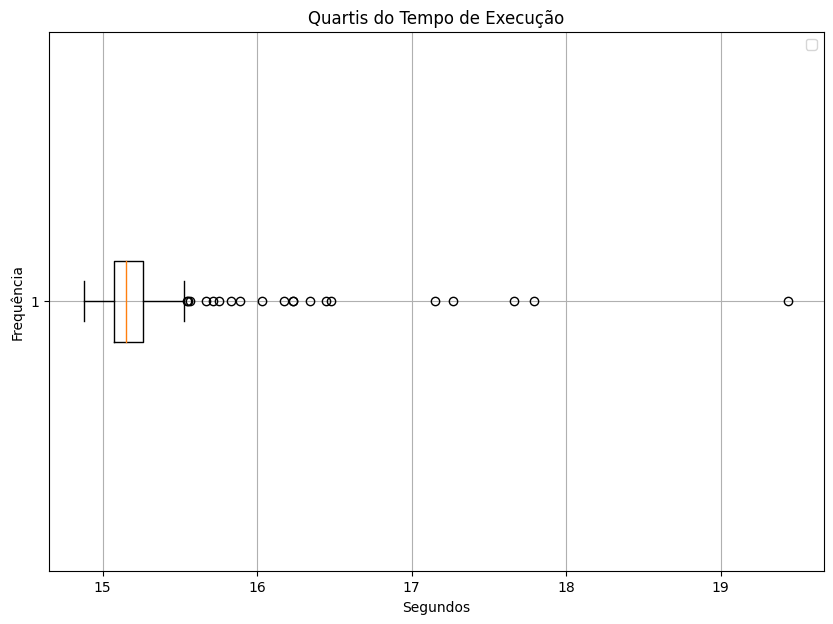

In [19]:
# Gráfico BoxPlot
plt.figure(figsize=(10,7))
plt.boxplot(tempo_exec2[:,1], vert = False)
plt.title('Quartis do Tempo de Execução')
plt.ylabel('Frequência')
plt.xlabel('Segundos')
plt.legend()
plt.grid()
plt.show()

### **Removendo dados "extremos" - Outliers**
#### <font color='Red'> Ajustar os valores antes de executar </font>

In [20]:
# Remover valores da lista
int_sup = tempo_exec2_media + (2 * tempo_exec2_std)
int_inf = tempo_exec2_media - (2 * tempo_exec2_std)
print(f'Nº de registros originais: {tempo_exec2.shape[0]}')
registros = []
for i in range(tempo_exec2.shape[0]):
        if int_inf > tempo_exec2[i, 1] or tempo_exec2[i, 1] > int_sup:
            registros.append(i)
print(f'Qtd. de registros removidos: {len(registros)}')
print(f'Registros removidos: {registros}')
tempo_exec2 = np.delete(tempo_exec2, registros, 0)
print(f'Nº de registros corrigidos: {tempo_exec2.shape[0]}')
print(tempo_exec2[0:15])

Nº de registros originais: 200
Qtd. de registros removidos: 8
Registros removidos: [0, 1, 18, 19, 20, 22, 150, 165]
Nº de registros corrigidos: 192
[[ 2.       16.232727]
 [ 3.       15.751999]
 [ 4.       15.669103]
 [ 5.       15.717508]
 [ 6.       15.564827]
 [ 7.       15.46811 ]
 [ 8.       15.456142]
 [ 9.       15.548783]
 [10.       15.43963 ]
 [11.       15.526274]
 [12.       15.491144]
 [13.       15.467816]
 [14.       15.888491]
 [15.       15.210313]
 [16.       15.217582]]


### Salvando os registros corrigidos

In [21]:
np.savetxt('dataset_single_core_corrigido.txt', tempo_exec2, fmt='%f')

In [22]:
# Média
tempo_exec2_media = tempo_exec2[:,1].mean()
print('Tempo médio de execução %f' %tempo_exec2_media)

Tempo médio de execução 15.200943


In [23]:
# Desvio Padrão
tempo_exec2_std = tempo_exec2[:,1].std()
print('Desvio padrão %.4f' %tempo_exec2_std)

Desvio padrão 0.2168


In [24]:
# Médiana
tempo_exec2_mediana = np.median(tempo_exec2[:,1])
print('Tempo mediano de execuçao %.4f' %tempo_exec2_mediana)

Tempo mediano de execuçao 15.1457


## Estatística - DISTRIBUIÇÕES DE PROBABILIDADE

### Distribuição Normal

#### Amostra (Média da População)

In [25]:
# Parâmetros para uma media de amostragens
tam_amost = 50
qtd_amost = 200

In [26]:
# Obtendo a media de amostragens
amostra = []
for i in range(qtd_amost):
    amostra.append(np.random.choice(tempo_exec2[:,1], tam_amost).mean())
amostra = np.array(amostra)

In [27]:
# Valores Centrais da amostragem
amostra_media   = amostra.mean()
amostra_std     = amostra.std()
amostra_mediana = np.median(amostra)
print('** Valores Centrais da Amostra **')
print('Média da amostra:       %.4f' %amostra_media)
print('Desv.Padrão da amostra: %.4f' %amostra_std)
print('Mediana da amostra:     %.4f' %amostra_mediana)

** Valores Centrais da Amostra **
Média da amostra:       15.2016
Desv.Padrão da amostra: 0.0291
Mediana da amostra:     15.2027


In [28]:
# Desvio Padrão de inferência calculado
round(tempo_exec2_std / np.sqrt(tam_amost),4)

0.0307

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


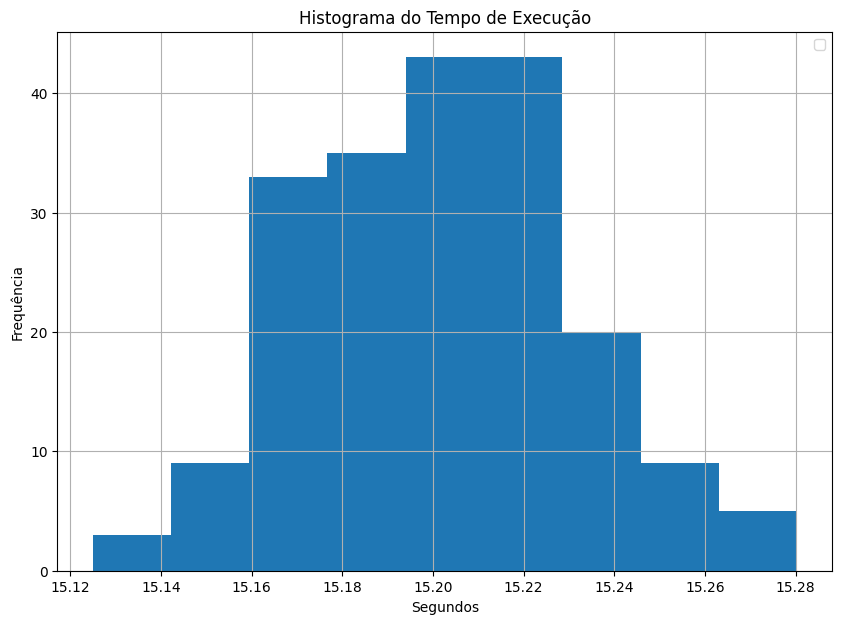

In [29]:
# Visualizando a amostra:
plt.figure(figsize=(10,7))
plt.hist(amostra, bins = k)
plt.title('Histograma do Tempo de Execução')
plt.ylabel('Frequência')
plt.xlabel('Segundos')
plt.legend()
plt.grid()
plt.show()

In [30]:
# Considerando a confiança de 99%
intervalo = norm.interval(alpha = 0.99, loc = amostra_media, scale = amostra_std)

C:\Users\Thiago\AppData\Local\Temp\ipykernel_16200\3257524375.py:2: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  intervalo = norm.interval(alpha = 0.99, loc = amostra_media, scale = amostra_std)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


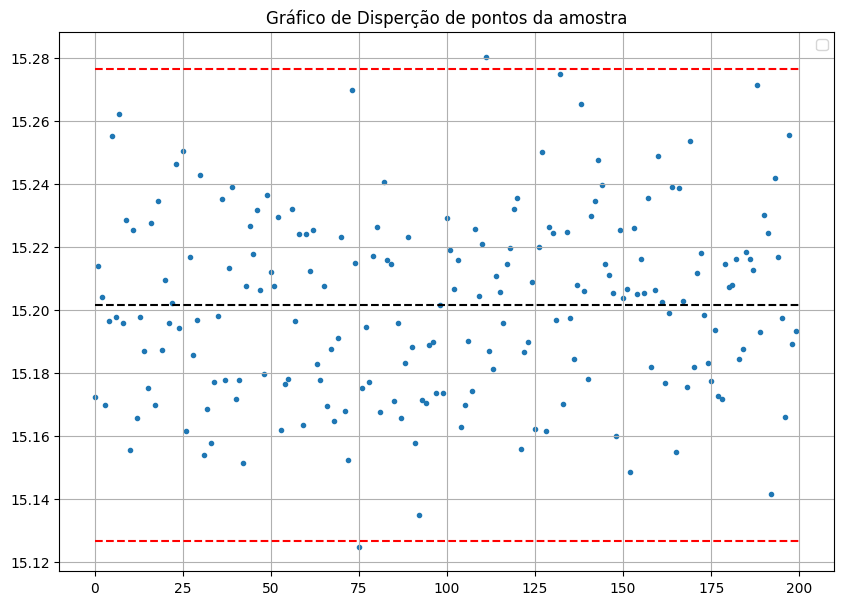

In [32]:
# Visualizando a disperção de Pontos da Amostra
plt.figure(figsize=(10,7))
plt.scatter([i for i in range(qtd_amost)], amostra, marker='.')
plt.hlines(y=intervalo[0], xmin=0, xmax=qtd_amost, color='red', linestyles='dashed')
plt.hlines(y=intervalo[1], xmin=0, xmax=qtd_amost, color='red', linestyles='dashed')
plt.hlines(y=amostra_media, xmin=0, xmax=qtd_amost, color='black', linestyles='dashed')
plt.title('Gráfico de Disperção de pontos da amostra')
plt.legend()
plt.grid()
plt.show()